# PED - Práctica - juego de los euromillones
#### Adrián José Zapater Reig

## Librerías requeridas:
- Pandas
- NumPy

In [1]:
import numpy as np
import pandas as pd

### Ejercicio 1:
Explora el fichero y decide cómo tienes que realizar la importación para poder guardar la información. ¿En qué estructura lo vas a guardar y qué información concreta contiene? Escribe el código asociado y trata de optimizar el espacio utilizado.

Cargamos el fichero CSV a un Dataframe para poder analizarlo y manipularlo con facilidad:

In [2]:
import os

path_to_src_file = os.path.join('source_data','historicoEuromillones.csv')
src_data = pd.read_csv(path_to_src_file)

In [3]:
src_data

,FECHA,COMB. GANADORA,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,ESTRELLAS,Unnamed: 8
0,13/10/2020,5,14,38,41,46,NaN,1,10
1,9/10/2020,11,15,35,41,50,NaN,5,8
2,6/10/2020,4,21,36,41,47,NaN,9,11
3,2/10/2020,6,12,15,40,45,NaN,3,9
4,29/09/2020,4,14,16,41,44,NaN,11,12
...,...,...,...,...,...,...,...,...,...
1358,12/03/2004,15,24,28,44,47,NaN,4,5
1359,5/03/2004,4,7,33,37,39,NaN,1,5
1360,27/02/2004,14,18,19,31,37,NaN,4,5
1361,20/02/2004,7,13,39,47,50,NaN,2,5


la información contenida en el CSV es:
- Fecha
- 5 columnas con la combinación ganadora
- Columna vacía con NaNs
- 2 columnas con la combinación de números estrella

### Optimización del espacio:

In [4]:
# Calculamos el espacio que ocupa el DF. Forzamos que se calcule el espacio real y no una estimación con el flag 'memory_usage=deep'
src_data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1363 entries, 0 to 1362
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   FECHA           1363 non-null   object 
 1   COMB. GANADORA  1363 non-null   int64  
 2   Unnamed: 2      1363 non-null   int64  
 3   Unnamed: 3      1363 non-null   int64  
 4   Unnamed: 4      1363 non-null   int64  
 5   Unnamed: 5      1363 non-null   int64  
 6   Unnamed: 6      0 non-null      float64
 7   ESTRELLAS       1363 non-null   int64  
 8   Unnamed: 8      1363 non-null   int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 174.1 KB


In [5]:
# Todos los valores son NA.
src_data['Unnamed: 6'].notna().values.any()

False

El Dataframe original ocupa **174.1 KB** de memoria, y usa tipos de dato genéricos que podemos acotar porque conocemos los límites de cada columna.
</br>Por ejemplo: 
- 1 Los valores de los números ganadores y las estrellas van del 1-50 y 1-12 respectivamente, por lo que podemos almacenar la información en un un **uint8** (entero de 8bits sin signo).
- 2 La columna 'Unnamed 6', que es un **float64** y que ocupará mucha memoria, la podemos borrar porque no contiene ningún registro.

In [6]:
# hacemos una copia del DF con la información original para no modificar el objeto src_data.
opt_src_data = src_data.copy()
# borramos la columna que no nos sirve:
opt_src_data.drop('Unnamed: 6', axis=1, inplace=True)
# Renombramos las columnas para que sea mas manejable:
cols_to_rename = {
    'COMB. GANADORA': 'num1', 
    'Unnamed: 2':'num2', 
    'Unnamed: 3':'num3', 
    'Unnamed: 4':'num4', 
    'Unnamed: 5':'num5', 
    'ESTRELLAS' :'est1', 
    'Unnamed: 8':'est2'
}
opt_src_data.rename(columns=cols_to_rename, inplace=True)
opt_src_data

,FECHA,num1,num2,num3,num4,num5,est1,est2
0,13/10/2020,5,14,38,41,46,1,10
1,9/10/2020,11,15,35,41,50,5,8
2,6/10/2020,4,21,36,41,47,9,11
3,2/10/2020,6,12,15,40,45,3,9
4,29/09/2020,4,14,16,41,44,11,12
...,...,...,...,...,...,...,...,...
1358,12/03/2004,15,24,28,44,47,4,5
1359,5/03/2004,4,7,33,37,39,1,5
1360,27/02/2004,14,18,19,31,37,4,5
1361,20/02/2004,7,13,39,47,50,2,5


In [7]:
opt_src_data['num1'] = opt_src_data['num1'].astype('uint8')
opt_src_data['num2'] = opt_src_data['num2'].astype('uint8')
opt_src_data['num3'] = opt_src_data['num3'].astype('uint8')
opt_src_data['num4'] = opt_src_data['num4'].astype('uint8')
opt_src_data['num5'] = opt_src_data['num5'].astype('uint8')
opt_src_data['est1'] = opt_src_data['est1'].astype('uint8')
opt_src_data['est2'] = opt_src_data['est2'].astype('uint8')
opt_src_data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1363 entries, 0 to 1362
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   FECHA   1363 non-null   object
 1   num1    1363 non-null   uint8 
 2   num2    1363 non-null   uint8 
 3   num3    1363 non-null   uint8 
 4   num4    1363 non-null   uint8 
 5   num5    1363 non-null   uint8 
 6   est1    1363 non-null   uint8 
 7   est2    1363 non-null   uint8 
dtypes: object(1), uint8(7)
memory usage: 98.2 KB


Con este cambio hemos logrado reducir la memoria hasta 98.2 KB, una reducción del 43%

# Ejercicio 2:
Queremos obtener algunas estadísticas relativas al histórico. Concretamente, ¿cuál es la moda, mediana y media de los números? ¿y de las estrellas? ¿puedes obtenerlo para cada año? ¿y para cada mes? Nota: cuando decimos cada mes, nos referimos a todos los meses de, por ejemplo, enero en conjunto. No al mes de enero de 2018 por un lado, al mes de enero de 2017 por otro lado, etc.
Escribe el código asociado para realizar todos estos cálculos.

Tenemos que modificar la estructura para que nos sea mas fácil realizar los calculos que se plantean. Necesitamos una estructura que nos permita consultar la información a nivel de mes desglosado por número. 

In [8]:
reorg_data = opt_src_data.melt(id_vars=['FECHA'], value_vars=['num1','num2','num3','num4','num5','est1','est2'])
reorg_data['year'] = reorg_data['FECHA'].str.split(pat='/',expand=True)[2]
reorg_data['month'] = reorg_data['FECHA'].str.split(pat='/',expand=True)[1]
reorg_data['day'] = reorg_data['FECHA'].str.split(pat='/',expand=True)[0]
reorg_data

,FECHA,variable,value,year,month,day
0,13/10/2020,num1,5,2020,10,13
1,9/10/2020,num1,11,2020,10,9
2,6/10/2020,num1,4,2020,10,6
3,2/10/2020,num1,6,2020,10,2
4,29/09/2020,num1,4,2020,09,29
...,...,...,...,...,...,...
9536,12/03/2004,est2,5,2004,03,12
9537,5/03/2004,est2,5,2004,03,5
9538,27/02/2004,est2,5,2004,02,27
9539,20/02/2004,est2,5,2004,02,20


In [9]:
# Borramos la columna fecha (ya no la necesitamos)
reorg_data.drop(columns=['FECHA'], inplace=True)

# Renombramos las columnas
reorg_data = reorg_data.rename(columns={'variable': 'type', 'value': 'num'})
reorg_data

,type,num,year,month,day
0,num1,5,2020,10,13
1,num1,11,2020,10,9
2,num1,4,2020,10,6
3,num1,6,2020,10,2
4,num1,4,2020,09,29
...,...,...,...,...,...
9536,est2,5,2004,03,12
9537,est2,5,2004,03,5
9538,est2,5,2004,02,27
9539,est2,5,2004,02,20


In [10]:
reorg_data['type'] = np.select(
    [
        reorg_data['type'].str[:3] == 'num', 
        reorg_data['type'].str[:3] == 'est'
    ], 
    [
        'numero', 
        'estrella'
    ], 
    default='NA'
)

In [11]:
reorg_data['type'].unique()

array(['numero', 'estrella'], dtype=object)

Ahora que ya tenemos nuestra estructura, volvemos a optimizar el espacio que ocupa en memoria:

In [12]:
reorg_data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9541 entries, 0 to 9540
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    9541 non-null   object
 1   num     9541 non-null   uint8 
 2   year    9541 non-null   object
 3   month   9541 non-null   object
 4   day     9541 non-null   object
dtypes: object(4), uint8(1)
memory usage: 2.2 MB


In [13]:
reorg_data['type'] = reorg_data['type'].astype('category')
reorg_data['year'] = reorg_data['year'].astype('uint16')
reorg_data['month'] = reorg_data['month'].astype('uint8')
reorg_data['day'] = reorg_data['day'].astype('uint8')

In [14]:
reorg_data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9541 entries, 0 to 9540
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   type    9541 non-null   category
 1   num     9541 non-null   uint8   
 2   year    9541 non-null   uint16  
 3   month   9541 non-null   uint8   
 4   day     9541 non-null   uint8   
dtypes: category(1), uint16(1), uint8(3)
memory usage: 56.3 KB


Hemos bajado de 2.2 MB a 56.3 KB.

In [15]:
def print_stats(data):
    print('Media:')
    print(data['num'].mean())
    print('Mediana:')
    print(data['num'].median())
    print('Moda:')
    if isinstance(data, pd.core.frame.DataFrame):
        print(data['num'].mode())
    elif isinstance(data, pd.core.groupby.generic.DataFrameGroupBy):
        print(data['num'].apply(lambda x: x.mode()))
    

In [16]:
numeros = reorg_data[reorg_data['type'] == 'numero']
estrellas = reorg_data[reorg_data['type'] == 'estrella']

### Estadisticas generales:

In [17]:
print_stats(numeros)

Media:
25.344827586206897
Mediana:
25.0
Moda:
0    23
dtype: uint8


In [18]:
print_stats(estrellas)

Media:
5.881878209831255
Mediana:
6.0
Moda:
0    2
dtype: uint8


### Estadisticas por año:

In [19]:
print_stats(reorg_data.groupby(['year','type']))

Media:
year  type    
2004  estrella     5.042553
      numero      24.148936
2005  estrella     4.923077
      numero      25.311538
2006  estrella     4.759615
      numero      24.669231
2007  estrella     5.076923
      numero      25.638462
2008  estrella     5.096154
      numero      24.630769
2009  estrella     4.817308
      numero      25.769231
2010  estrella     5.264151
      numero      26.335849
2011  estrella     5.773256
      numero      25.653488
2012  estrella     6.100962
      numero      25.088462
2013  estrella     5.890476
      numero      25.516190
2014  estrella     6.096154
      numero      25.846154
2015  estrella     6.591346
      numero      25.619231
2016  estrella     6.090476
      numero      24.874286
2017  estrella     6.201923
      numero      25.380769
2018  estrella     6.735577
      numero      25.650000
2019  estrella     6.100000
      numero      25.550476
2020  estrella     6.384146
      numero      24.541463
Name: num, dtype: float64


### Estadisticas por mes:

In [20]:
print_stats(reorg_data.groupby(['month','type']))

Media:
month  type    
1      estrella     5.792793
       numero      24.677477
2      estrella     6.014423
       numero      26.148077
3      estrella     6.381579
       numero      25.340351
4      estrella     5.678571
       numero      25.887500
5      estrella     5.991597
       numero      25.176471
6      estrella     5.786957
       numero      25.342609
7      estrella     5.859504
       numero      25.114050
8      estrella     6.016949
       numero      25.811864
9      estrella     5.750000
       numero      25.813793
10     estrella     6.000000
       numero      25.351304
11     estrella     5.738318
       numero      24.411215
12     estrella     5.554054
       numero      25.057658
Name: num, dtype: float64
Mediana:
month  type    
1      estrella     6.0
       numero      24.0
2      estrella     6.0
       numero      27.0
3      estrella     6.0
       numero      26.0
4      estrella     5.0
       numero      25.5
5      estrella     6.0
       numero 

# Ejercicio 3:
¿Cuáles han sido los 5 números más repetidos? ¿y las 2 estrellas? Responde a las mismas preguntas para cada año y cada mes (entendiendo mes igual que en el ejercicio anterior).

In [21]:
def num_mas_freq(data, tipo, key=['type','num'], num_resultados=5):
    data = data.groupby(key)['num'].count()
    return data.filter(like=tipo, axis=0).sort_values(ascending=False).head(num_resultados)

In [22]:
# 5 números mas repetidos
num_mas_freq(reorg_data, 'numero')

type    num
numero  23     160
        44     155
        50     154
        19     153
        4      150
Name: num, dtype: int64

In [23]:
# 2 estrellas mas repetidas
num_mas_freq(reorg_data, 'estrella', num_resultados=2)

type      num
estrella  2      280
          8      274
Name: num, dtype: int64

In [24]:
# Por mes y año:
def num_mas_freq_por_categoria(data, tipo, categoria, key=['type','num'], num_resultados=5):
    data = data.groupby(key)['num'].count()
    #return data.filter(like=tipo, axis=0).groupby([categoria]).apply(lambda x: x.sort_values(["count"], ascending = False)).reset_index(drop=True).head(num_resultados)
    return data.groupby(categoria).nlargest(num_resultados)

Frequencia de numeros por mes y año:

In [25]:
# Por año:
num_mas_freq_por_categoria(reorg_data, 'numero', 'year', key=['type', 'year', 'num'])

year  type      year  num
2004  estrella  2004  5      15
                      6      13
                      2      12
                      9      11
                      1      10
                             ..
2020  estrella  2020  6      18
                      2      16
                      4      15
                      8      15
                      7      14
Name: num, Length: 85, dtype: int64

In [26]:
# Por mes
num_mas_freq_por_categoria(reorg_data, 'numero', 'month', key=['type', 'month', 'num'])

month  type      month  num
1      estrella  1      8      31
                        4      25
                        6      25
                        5      23
                        1      19
2      estrella  2      9      25
                        2      24
                        7      24
                        4      21
                        6      19
3      estrella  3      6      27
                        9      24
                        8      23
                        1      21
                        7      21
4      estrella  4      5      26
                        2      25
                        1      22
                        3      22
                        6      21
5      estrella  5      6      29
                        9      27
                        2      26
                        5      22
                        3      21
6      estrella  6      1      29
                        2      25
                        9      25
                    

Frequencia de estrellas por mes y año:

In [27]:
num_mas_freq_por_categoria(reorg_data, 'estrella', 'year', key=['type', 'year', 'num'], num_resultados=2)

year  type      year  num
2004  estrella  2004  5      15
                      6      13
2005  estrella  2005  1      17
                      3      14
2006  estrella  2006  3      15
                      1      13
2007  estrella  2007  6      14
                      8      14
2008  estrella  2008  4      14
                      5      14
2009  estrella  2009  3      15
                      5      15
2010  estrella  2010  7      18
                      3      14
2011  estrella  2011  2      21
                      5      20
2012  estrella  2012  2      27
                      8      22
2013  estrella  2013  2      24
                      5      23
2014  estrella  2014  1      23
                      10     23
2015  estrella  2015  8      33
                      10     27
2016  estrella  2016  2      28
                      10     21
2017  estrella  2017  3      26
                      9      23
2018  estrella  2018  12     28
                      4      21
2019  estrella

In [28]:
num_mas_freq_por_categoria(reorg_data, 'estrella', 'month', key=['type', 'month', 'num'], num_resultados=2)

month  type      month  num
1      estrella  1      8      31
                        4      25
2      estrella  2      9      25
                        2      24
3      estrella  3      6      27
                        9      24
4      estrella  4      5      26
                        2      25
5      estrella  5      6      29
                        9      27
6      estrella  6      1      29
                        2      25
7      estrella  7      3      31
                        8      27
8      estrella  8      5      33
                        8      28
9      estrella  9      1      28
                        9      28
10     estrella  10     8      31
                        3      28
11     estrella  11     2      28
                        3      24
12     estrella  12     2      30
                        3      28
Name: num, dtype: int64

# Ejercicio 4
Para realizar todos estos procesamientos de cálculo de estadísticas y elementos más repetidos, ¿has exportado la estructura inicial a alguna otra estructura que te facilite el procesamiento? Justifica la respuesta

Si, como hemos visto en el ejercicio 2, he tenido que modificar la estructura original. La nueva estructura tenía que permitir operar con números y estrellas por separado y perimitir el acceso a la información por año y mes, por eso sólo tenemos una columna con números y otra columna que inndica el tipo (numero y estrella). Para poder operar a nivel de mes y de año he añadido 1 columna para consultar el año y otra para el mes y asi poder agrupar por esas columnas.

# Ejercicio 5:
Implementa una función que dada una apuesta, genere una tabla de posibles premios que dicha apuesta hubiera obtenido en los sorteos de los que se dispone de información. Se deberá indicar tanto la categoría de premio como la fecha del sorteo y se omitirán aquellos sorteos en los que la apuesta no hubiera resultado premiada. La función debe de comprobar que la apuesta sea válida antes de buscar los premios.

In [29]:
reorg_data

,type,num,year,month,day
0,numero,5,2020,10,13
1,numero,11,2020,10,9
2,numero,4,2020,10,6
3,numero,6,2020,10,2
4,numero,4,2020,9,29
...,...,...,...,...,...
9536,estrella,5,2004,3,12
9537,estrella,5,2004,3,5
9538,estrella,5,2004,2,27
9539,estrella,5,2004,2,20


En primer lugar vamos a crear un DataFrame con los premios.
![Premios](img/tabla_premios.png)

In [30]:
data = np.array([[1,5,2],[2,5,1],[3,5,0],[4,4,2],[5,4,1],[6,3,2],[7,4,0],[8,2,2],[9,3,1],[10,3,0],[11,1,2],[12,2,1],[13,2,0]])
premios = pd.DataFrame(data, columns=['categoria','numeros_acertados', 'estrellas_acertadas'])
premios

,categoria,numeros_acertados,estrellas_acertadas
0,1,5,2
1,2,5,1
2,3,5,0
3,4,4,2
4,5,4,1
5,6,3,2
6,7,4,0
7,8,2,2
8,9,3,1
9,10,3,0


Ahora vamos a ver los pasos a seguir para calcular los premios de una apuesta inventada.

In [31]:
# Marcamos los registros premiados:
num_apuesta = [5, 2, 3, 6, 9]
est_apuesta = [10, 8]

# Como pandas no permite realizar ciertas operaciones sobre columnas de tipo 'Category', necesitamos 2 columnas nueva auxiliares:
reorg_data['is_estrella'] = reorg_data['type'] == 'estrella'
reorg_data['is_numero'] = reorg_data['type'] == 'numero'


# marcamos los numeros premiados
reorg_data['is_num_premiado'] = reorg_data['num'].isin(num_apuesta) & reorg_data['is_numero']
reorg_data['is_estrella_premiada'] = reorg_data['num'].isin(est_apuesta) & reorg_data['is_estrella']

reorg_data

,type,num,year,month,day,is_estrella,is_numero,is_num_premiado,is_estrella_premiada
0,numero,5,2020,10,13,False,True,True,False
1,numero,11,2020,10,9,False,True,False,False
2,numero,4,2020,10,6,False,True,False,False
3,numero,6,2020,10,2,False,True,True,False
4,numero,4,2020,9,29,False,True,False,False
...,...,...,...,...,...,...,...,...,...
9536,estrella,5,2004,3,12,True,False,False,False
9537,estrella,5,2004,3,5,True,False,False,False
9538,estrella,5,2004,2,27,True,False,False,False
9539,estrella,5,2004,2,20,True,False,False,False


In [32]:
# Agrupamos por tipo y fecha y sumamos todos los números premiados para obtener, 
# para cada fecha y tipo (numero o estrella) el total de números acetados.
num_premiados = reorg_data.groupby(['year', 'month', 'day']).agg({'is_num_premiado':'sum', 'is_estrella_premiada':'sum'})
num_premiados = num_premiados.rename(columns={'is_num_premiado': 'num_premiados', 'is_estrella_premiada': 'estrellas_premiadas'})

# Nos quedamos solo con las fechas premiadas. Reseteamos los indices para no perder las columnas.
num_premiados = num_premiados[(num_premiados['num_premiados'] > 0) | (num_premiados['estrellas_premiadas'] > 0)]
num_premiados = num_premiados.reset_index()
num_premiados

,year,month,day,num_premiados,estrellas_premiadas
0,2004,3,26,1,0
1,2004,4,9,0,1
2,2004,4,23,1,0
3,2004,4,30,2,0
4,2004,5,14,1,0
...,...,...,...,...,...
820,2020,9,15,0,1
821,2020,9,18,1,0
822,2020,10,2,1,0
823,2020,10,9,0,1


In [33]:
# Cruzamos el resultado contra la tabla de premios para obtener la categoría
# Renombramos las columnas y convertimos el numero de premiados a indice para hacer el join.
premiados_aux = num_premiados.rename(columns={'num_premiados':'key_1', 'estrellas_premiadas': 'key_2'}).set_index(['key_1','key_2'])
premios_aux = premios.rename(columns={'numeros_acertados':'key_1', 'estrellas_acertadas': 'key_2'}).set_index(['key_1','key_2'])


premios_por_fecha = premiados_aux.join(premios_aux)
# Nos quedamos solo con los premiados:
premios_por_fecha = premios_por_fecha[premios_por_fecha['categoria'].notna()]
premios_por_fecha.reset_index(drop=True)

,year,month,day,categoria
0,2011,6,14,11.0
1,2012,2,24,11.0
2,2012,7,17,11.0
3,2014,8,15,11.0
4,2015,1,27,11.0
...,...,...,...,...
88,2006,1,6,10.0
89,2012,10,26,10.0
90,2016,4,5,10.0
91,2008,1,25,9.0


Ahora vamos a crear unas funciones para validar que las apuestas tienen el formato correcto:

In [34]:
def is_num_apuesta_valid(lista_numeros):
    # Comprobamos que la longitud sea correcta.
    if(len(lista_numeros) != 5):
        print("Error: Se requieren 5 números en la apuesta.")
        return False
    elif(len(lista_numeros) != len(set(lista_numeros))):
        # Los elementos repetidos se eliminan del set, por lo que si la logitud cambia existe al menos un repetido.
        print("Error: no puede haber números repetidos en la apuesta.")
        return False
    else:
        return True
    
    
def is_estrella_apuesta_valid(lista_estrellas):
    # Comprobamos que la longitud sea correcta.
    if(len(lista_estrellas) != 2):
        print("Error: Se requieren 2 numeros estrella en la apuesta.")
        return False
    elif(len(lista_estrellas) != len(set(lista_estrellas))):
        # Los elementos repetidos se eliminan del set, por lo que si la logitud cambia existe al menos un repetido.
        print("Error: no puede haber números repetidos en la apuesta.")
        return False
    else:
        return True

Ahora vamos a convertir todos los pasos anteriores en un método reutilizable:

In [35]:
def check_for_prizes(numeros, estrellas, premios, historico):
    # Validamos la entrada:
    if not is_estrella_apuesta_valid(estrellas) or not is_num_apuesta_valid(numeros):
        raise Exception('Apuesta con formato errónea')
           
    # Hacemos una copia de los datos para que no haya side efects.
    data = historico.copy()
    # Como pandas no permite realizar ciertas operaciones sobre columnas de tipo 'Category', necesitamos 2 columnas nueva auxiliares:
    data['is_estrella'] = data['type'] == 'estrella'
    data['is_numero'] = data['type'] == 'numero'

    # marcamos los numeros premiados
    data['is_num_premiado'] = data['num'].isin(numeros) & data['is_numero']
    data['is_estrella_premiada'] = data['num'].isin(estrellas) & data['is_estrella']

    # Agrupamos por tipo y fecha y sumamos todos los números premiados para obtener, 
    # para cada fecha y tipo (numero o estrella) el total de números acetados.
    num_premiados = data.groupby(['year', 'month', 'day']).agg({'is_num_premiado':'sum', 'is_estrella_premiada':'sum'})
    num_premiados = num_premiados.rename(columns={'is_num_premiado': 'num_premiados', 'is_estrella_premiada': 'estrellas_premiadas'})

    # Nos quedamos solo con las fechas premiadas. Reseteamos los indices para no perder las columnas.
    num_premiados = num_premiados[(num_premiados['num_premiados'] > 0) | (num_premiados['estrellas_premiadas'] > 0)]
    num_premiados = num_premiados.reset_index()

    # Cruzamos el resultado contra la tabla de premios para obtener la categoría
    # Renombramos las columnas y convertimos el numero de premiados a indice para hacer el join.
    premiados_aux = num_premiados.rename(columns={'num_premiados':'key_1', 'estrellas_premiadas': 'key_2'}).set_index(['key_1','key_2'])
    premios_aux = premios.rename(columns={'numeros_acertados':'key_1', 'estrellas_acertadas': 'key_2'}).set_index(['key_1','key_2'])


    premios_por_fecha = premiados_aux.join(premios_aux)
    # Nos quedamos solo con los premiados:
    premios_por_fecha = premios_por_fecha[premios_por_fecha['categoria'].notna()]
    return premios_por_fecha.reset_index(drop=True)

In [36]:
# Probamos la función.
check_for_prizes([1,2,3,4,5], [1, 4], premios, reorg_data)

,year,month,day,categoria
0,2005,7,22,11.0
1,2010,6,18,11.0
2,2013,1,22,11.0
3,2013,8,13,11.0
4,2013,11,15,11.0
...,...,...,...,...
108,2019,12,6,12.0
109,2020,2,25,12.0
110,2020,4,24,12.0
111,2018,10,23,10.0


# Ejercicio 6:
Crea una apuesta formada por los 5 números y las 2 estrellas más repetidas obtenidas en el ejercicio 3. ¿Qué premios habría obtenido dicha apuesta en todos los sorteos?

In [37]:
check_for_prizes([23,44,50,29,4], [3, 8], premios, reorg_data)

,year,month,day,categoria
0,2006,9,22,11.0
1,2008,4,25,11.0
2,2008,11,21,11.0
3,2010,12,17,11.0
4,2011,6,17,11.0
...,...,...,...,...
140,2006,10,27,9.0
141,2009,5,8,9.0
142,2014,3,11,9.0
143,2014,12,19,9.0


la combinación mas frecuente ha tenido 145 premios según nuestros datos.

# Ejercicio 7:
Queremos generar aleatoriamente 100 apuestas y guardarlas en un fichero. ¿Qué estructura de datos, de entre las estudiadas, usarías y cómo lo harías? Justifica tus decisiones (entre ellas el formato de salida usado en el fichero). Escribe el código necesario para crear la estructura y generar las distintas combinaciones. También escribe el código para guardar el contenido en un fichero.

Puesto que las apuestas están formadas por números sin orden (da lo mismo el orden de la apuesta) y que no pueden repetirse, la mejor estructura para este caso es el Set.
En cuanto al formato de salida del fichero, voy autilizar CSV por su facilidad de uso y permite consultar el fichero (no como los formato comprimidos).

La estructura de una apuesta es:

- id - Id de apuesta.
- num - Número
- type - Tipo de número (numero | estrella)

In [38]:
import random
def genera_muestras(min_val, max_val, num_muestras):
    return set(random.sample(range(min_val,max_val), num_muestras))

In [39]:
genera_muestras(1, 50, 5)

{2, 19, 32, 33, 42}

In [40]:
def genera_apuestas(num_apuestas=100):
    apuestas = []
    for i in range(100):
        numeros = genera_muestras(1, 50, 5)
        estrellas = genera_muestras(1, 12, 2)
        
        for num in numeros:
            apuestas.append([i, num, 'numero'])
            
        for estrella in estrellas:
            apuestas.append([i, estrella, 'estrella'])
            
    result = pd.DataFrame(apuestas, columns=['id', 'num', 'type'])
    result['id'] = result['id'].astype('uint16')
    result['num'] = result['num'].astype('uint8')
    result['type'] = result['type'].astype('category')

    return result

        
    

In [41]:
apuestas = genera_apuestas()
apuestas

,id,num,type
0,0,37,numero
1,0,41,numero
2,0,42,numero
3,0,23,numero
4,0,25,numero
...,...,...,...
695,99,47,numero
696,99,19,numero
697,99,28,numero
698,99,1,estrella


In [42]:
# Guardamos en un CSV:
apuestas.to_csv('apuestas.csv', index=False)

# Ejercicio 8
A partir de los datos generados en el ejercicio 7, obtén los números y las estrellas más repetidos.

In [43]:
apuestas = pd.read_csv('apuestas.csv')
apuestas['id'] = apuestas['id'].astype('uint16')
apuestas['num'] = apuestas['num'].astype('uint8')
apuestas['type'] = apuestas['type'].astype('category')
apuestas.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   id      700 non-null    uint16  
 1   num     700 non-null    uint8   
 2   type    700 non-null    category
dtypes: category(1), uint16(1), uint8(1)
memory usage: 3.1 KB


In [44]:
# Reutilizamos la función del ejercicio 3.
num_mas_freq(apuestas, 'numero')

type    num
numero  36     19
        16     16
        48     15
        17     15
        6      14
Name: num, dtype: int64

In [45]:
# Reutilizamos la función del ejercicio 3.
num_mas_freq(apuestas, 'estrella', num_resultados=2)

type      num
estrella  5      26
          1      24
Name: num, dtype: int64

# Ejercicio 9:
Supongamos que jugamos con las 100 apuestas generadas aleatoriamente. ¿Qué premios, y en qué fechas, habríamos obtenido con respecto al histórico que teníamos del principio? Piensa en al menos dos formas distintas de mostrar la información, discutiendo las ventajas e inconvenientes de cada una de ellas.

La primera manera, y además la mas sencilla, es presentar la información completa resumida a nivel de categoría. La ventaja principal es que tenemos el 100% de la información y que es muy sencillo de prigramar. La desventaja principal es que es muy extenso y no escala muy bien, si tenemos mas de 10 apuestas la visualización pierde efectividad.

In [46]:
def presentar_premios(premios_df):
    count_premios = premios_df.groupby(['categoria'])['categoria'].count().reset_index(name="count")
    for i, premio_categoria in count_premios.iterrows():
        print("{} premios de categoría #{}".format(premio_categoria['count'], premio_categoria['categoria']))

In [47]:
all_premios = pd.DataFrame(columns=['year', 'month', 'day', 'categoria'])
for apuesta_id in apuestas['id'].unique():
    print("Apuesta: " + str(apuesta_id))
    numeros = set(apuestas[(apuestas['id'] == apuesta_id) & (apuestas['type'] == 'numero')]['num'].values)
    estrellas = set(apuestas[(apuestas['id'] == apuesta_id) & (apuestas['type'] == 'estrella')]['num'].values)
    print("Numeros: ")
    print(*numeros, sep = ", ") 
    print("Estrellas: ")
    print(*estrellas, sep = ", ") 
    
    _premios = check_for_prizes(numeros, estrellas, premios, reorg_data)
    presentar_premios(_premios)
    all_premios = pd.concat([all_premios, _premios])
    print()

Apuesta: 0
Numeros: 
37, 41, 42, 23, 25
Estrellas: 
1, 6
1.0 premios de categoría #5.0
1.0 premios de categoría #8.0
3.0 premios de categoría #9.0
2.0 premios de categoría #10.0
19.0 premios de categoría #11.0
31.0 premios de categoría #12.0
67.0 premios de categoría #13.0

Apuesta: 1
Numeros: 
1, 37, 40, 12, 15
Estrellas: 
1, 3
1.0 premios de categoría #8.0
7.0 premios de categoría #9.0
2.0 premios de categoría #10.0
5.0 premios de categoría #11.0
40.0 premios de categoría #12.0
51.0 premios de categoría #13.0

Apuesta: 2
Numeros: 
1, 37, 43, 48, 27
Estrellas: 
5, 6
2.0 premios de categoría #8.0
1.0 premios de categoría #9.0
4.0 premios de categoría #10.0
3.0 premios de categoría #11.0
42.0 premios de categoría #12.0
61.0 premios de categoría #13.0

Apuesta: 3
Numeros: 
3, 10, 14, 16, 26
Estrellas: 
8, 7
2.0 premios de categoría #8.0
4.0 premios de categoría #9.0
5.0 premios de categoría #10.0
8.0 premios de categoría #11.0
35.0 premios de categoría #12.0
60.0 premios de categoría #13

La segunda manera de visualizar es mediante una gráfica. Vamos a utilizar un histograma para ver la frecuencia de premios por categoría.

In [48]:
%matplotlib inline
from matplotlib import pyplot as plt
import math

def presentar_premios_histograma(premios_df, apuesta_id):
    count_premios = premios_df.groupby(['categoria'])['categoria'].count().reset_index(name="num_premios")[['categoria','num_premios']]    
    count_premios.set_index(['categoria']).plot(kind="bar", title='Premios  de la apuesta {} por categoría'.format(apuesta_id))

/Users/adzarei/Documents/UNED/ING_CIENC_DATOS/projects/PED/conda-env/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:337: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


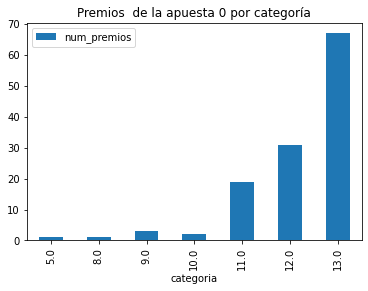

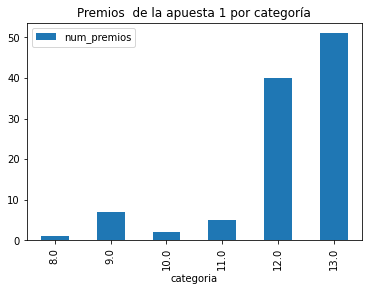

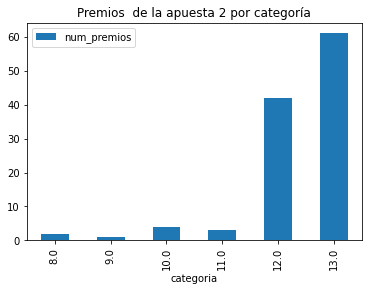

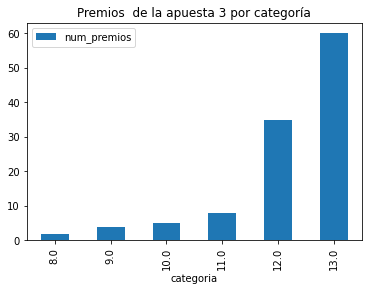

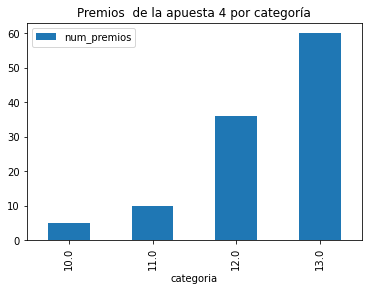

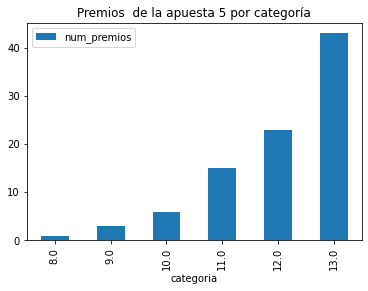

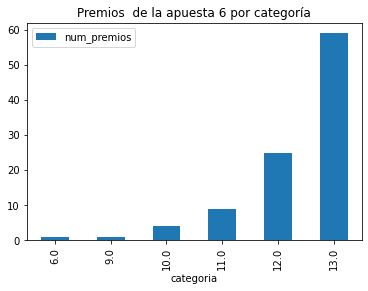

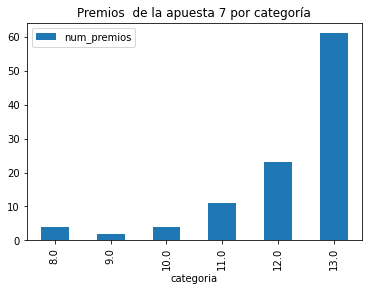

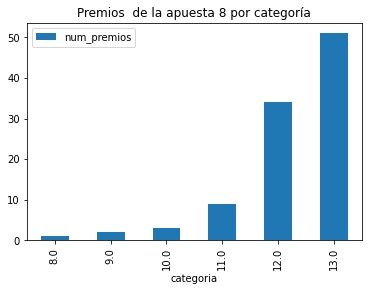

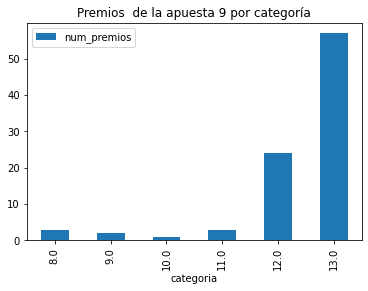

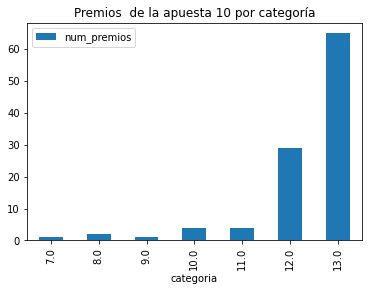

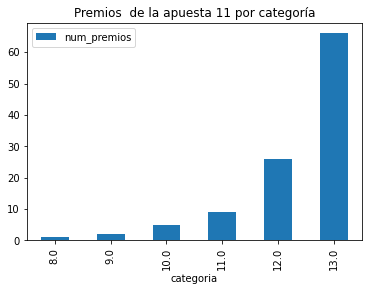

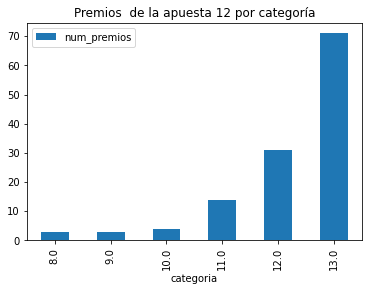

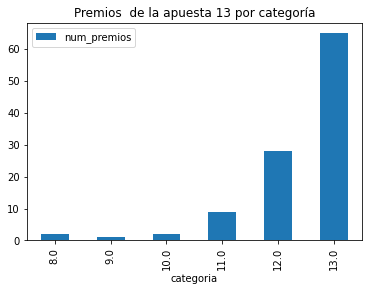

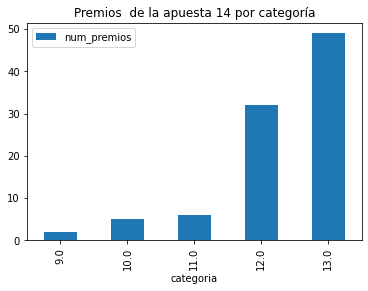

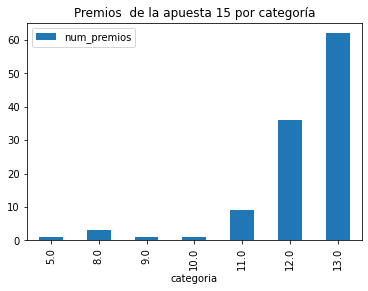

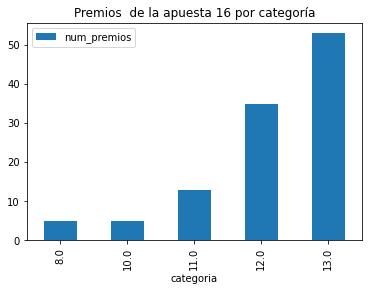

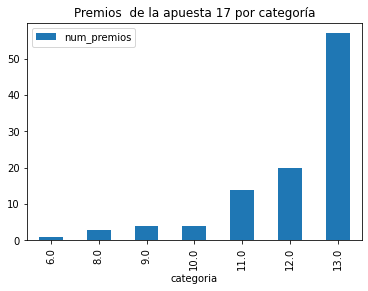

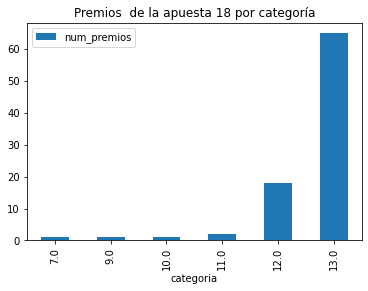

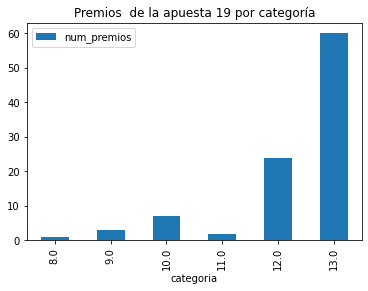

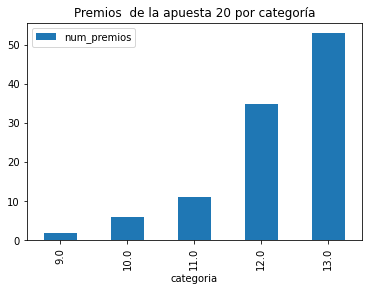

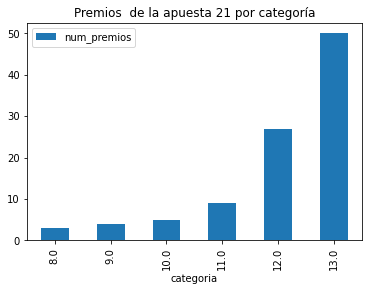

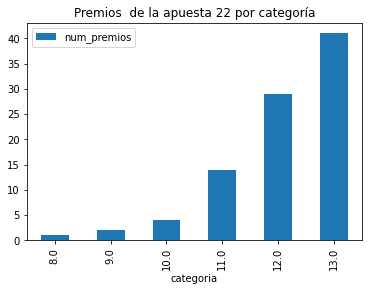

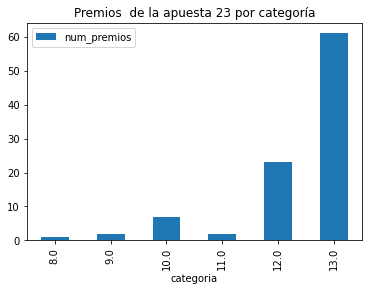

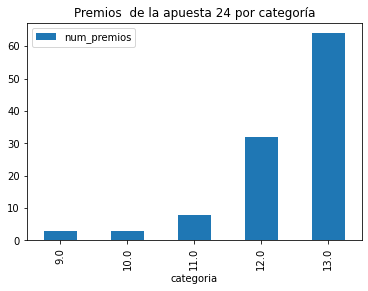

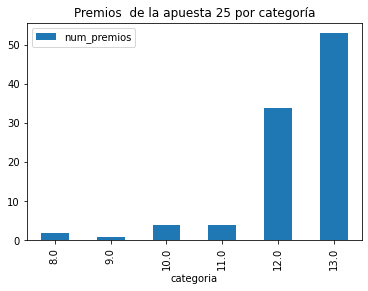

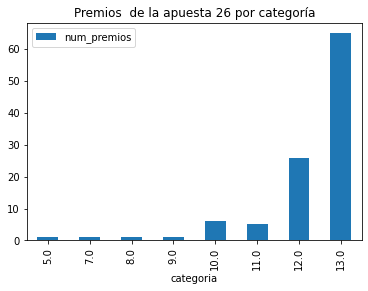

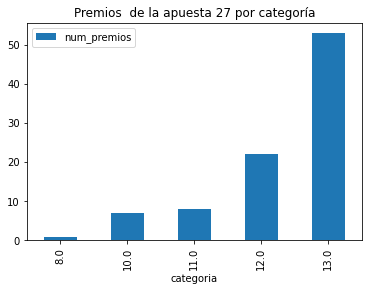

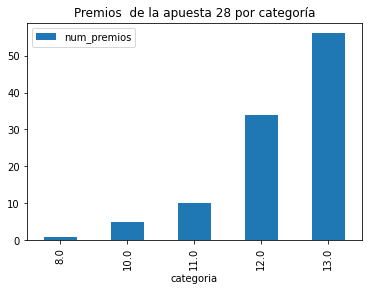

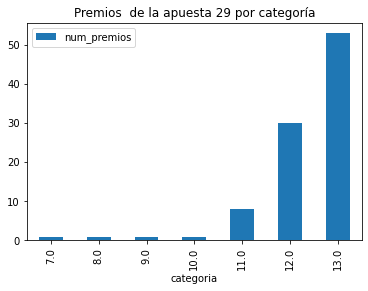

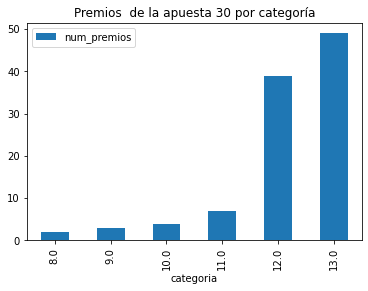

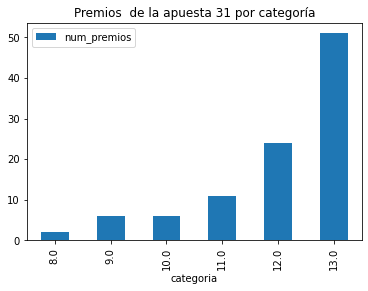

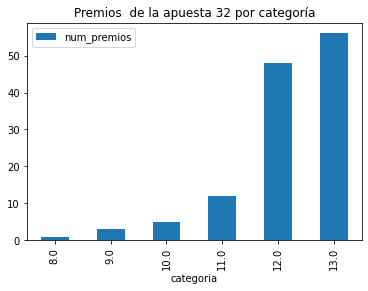

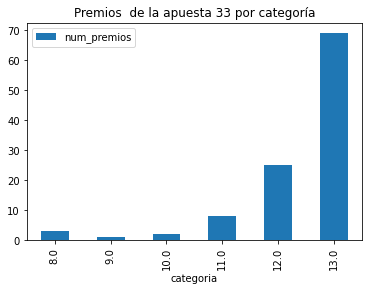

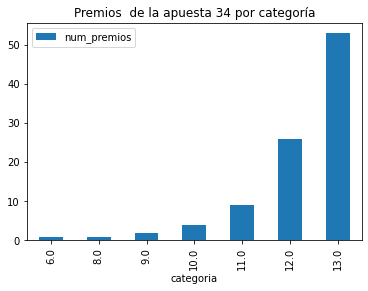

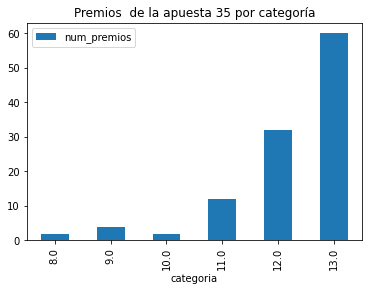

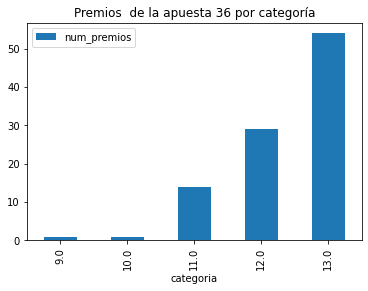

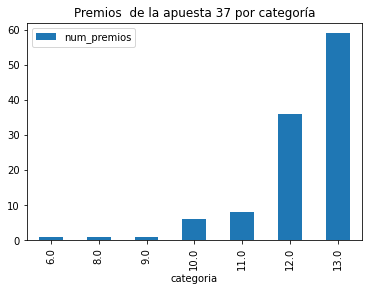

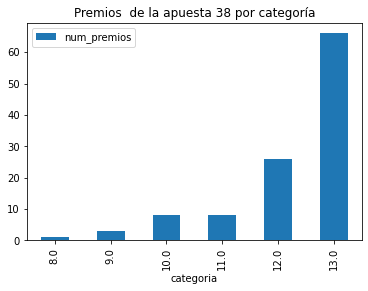

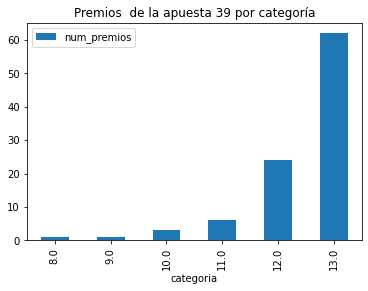

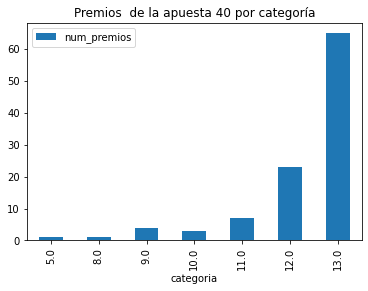

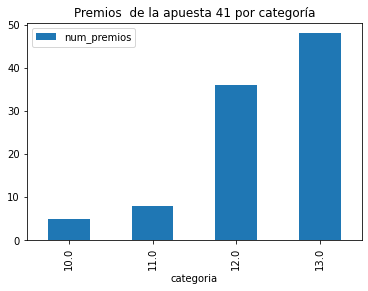

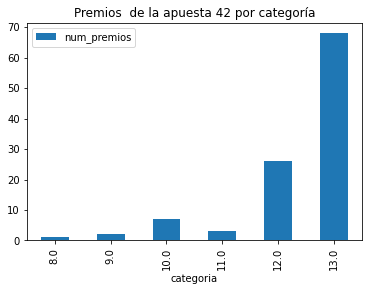

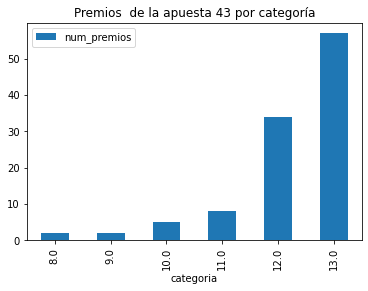

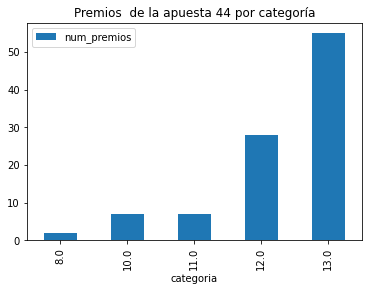

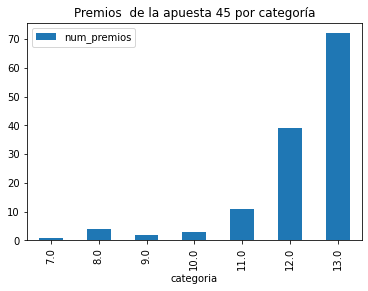

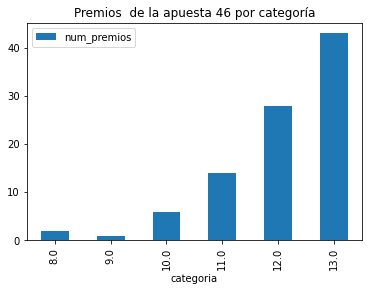

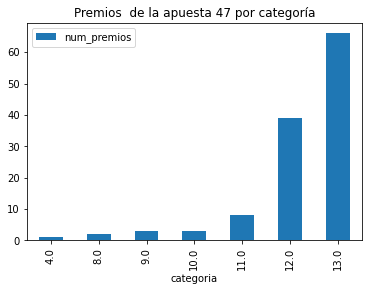

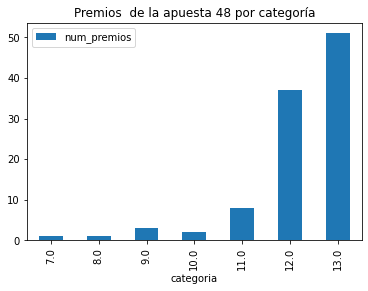

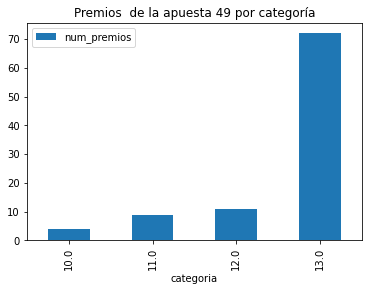

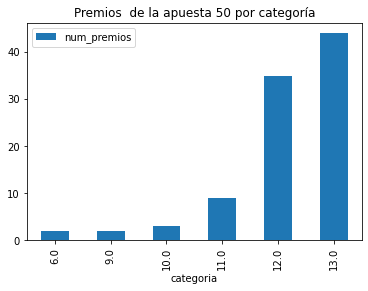

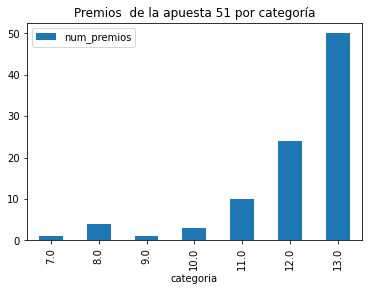

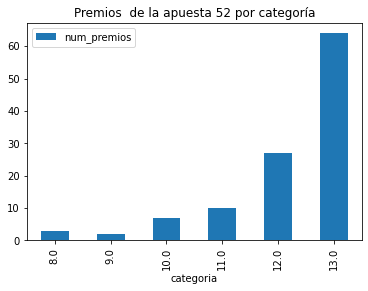

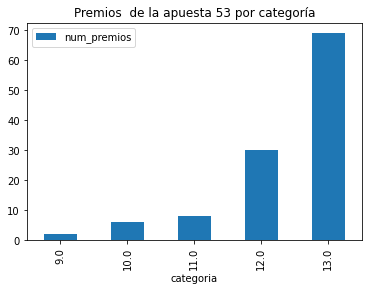

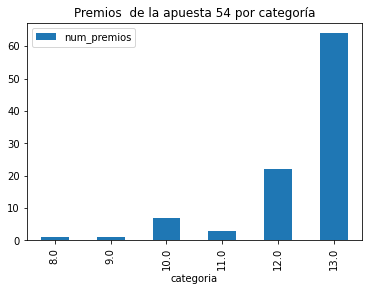

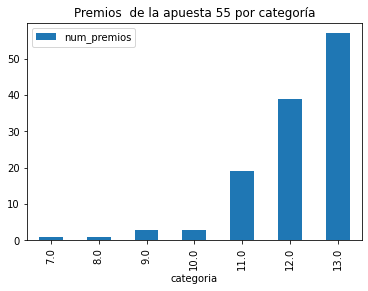

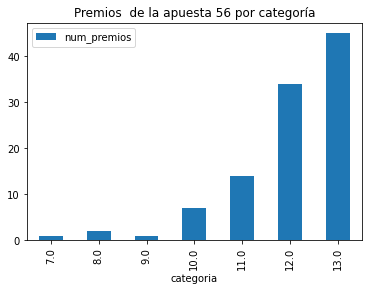

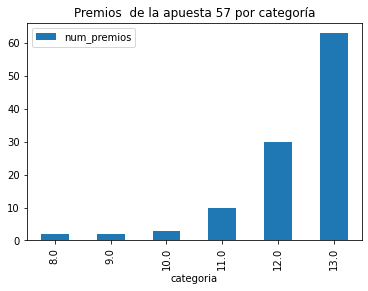

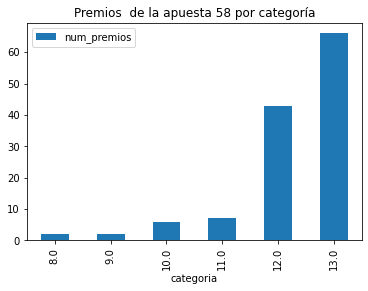

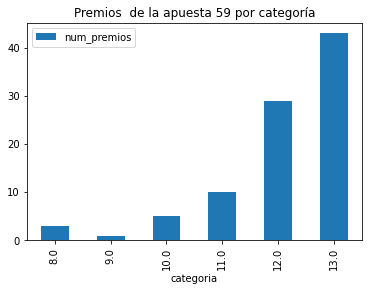

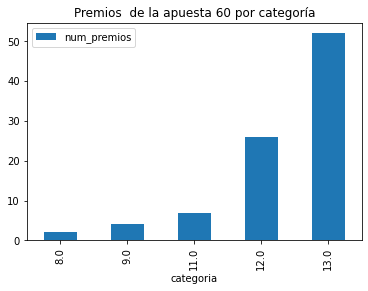

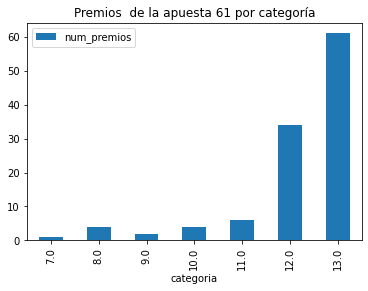

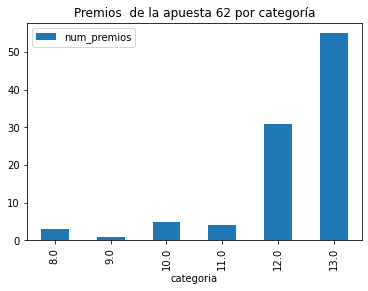

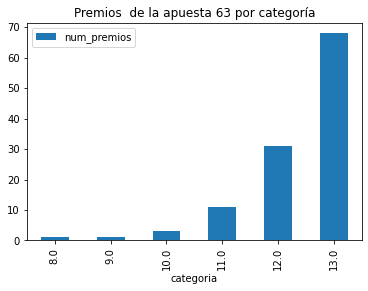

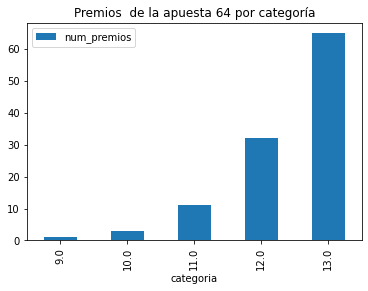

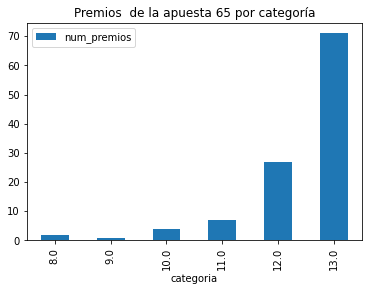

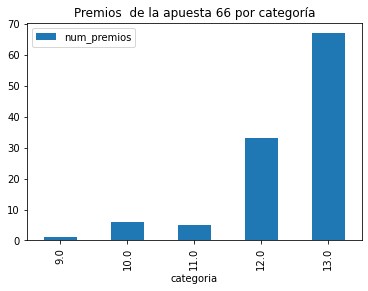

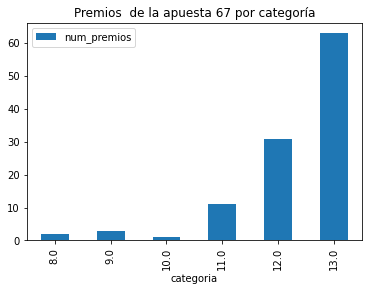

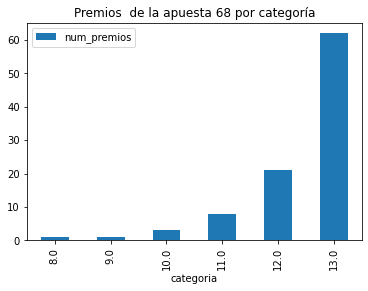

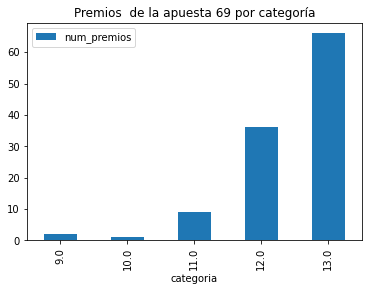

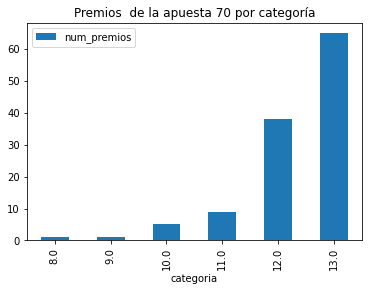

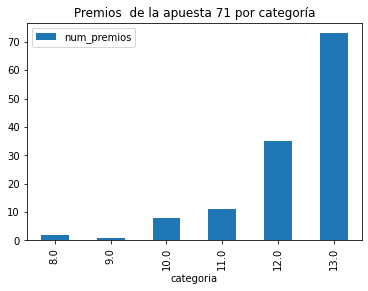

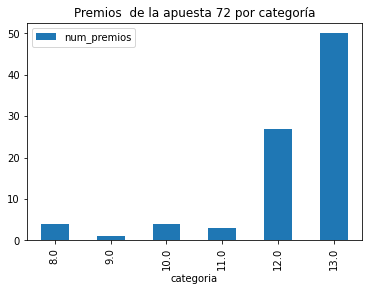

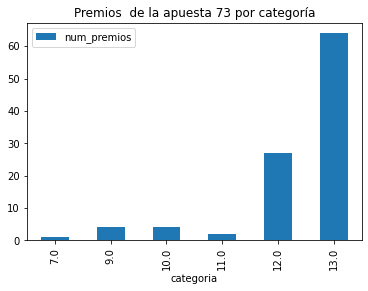

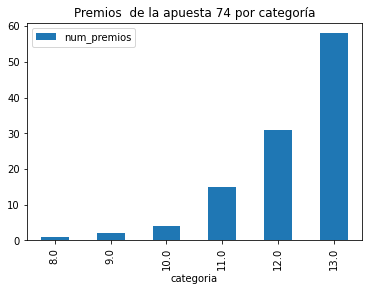

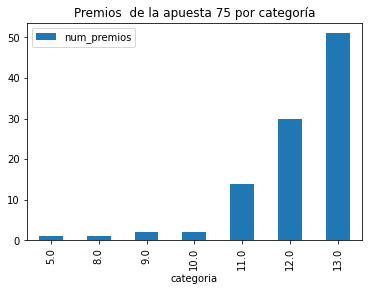

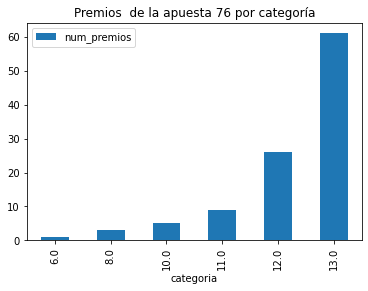

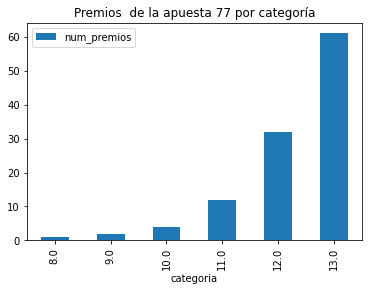

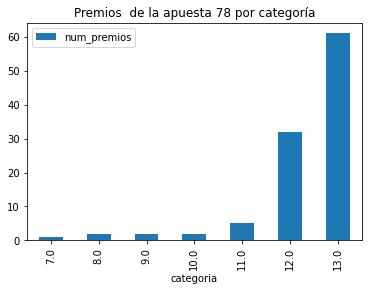

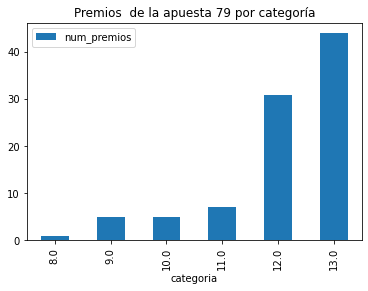

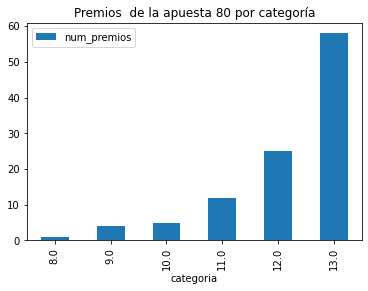

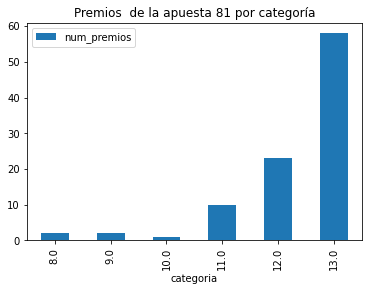

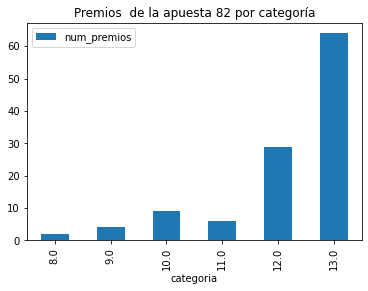

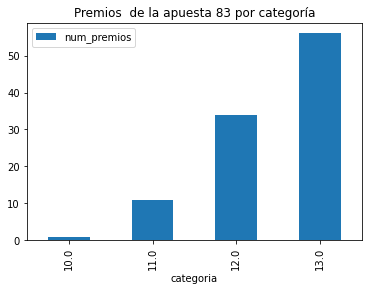

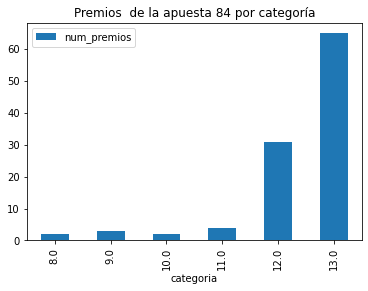

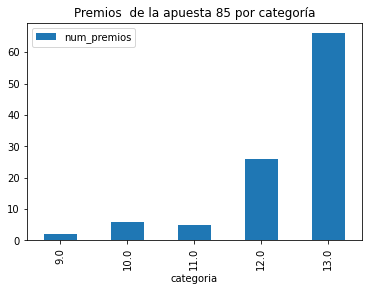

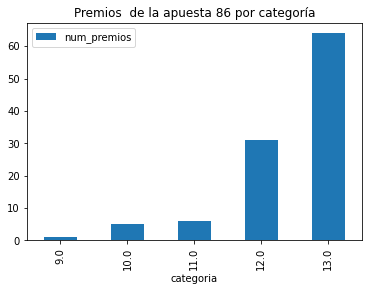

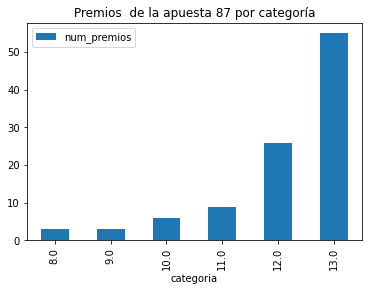

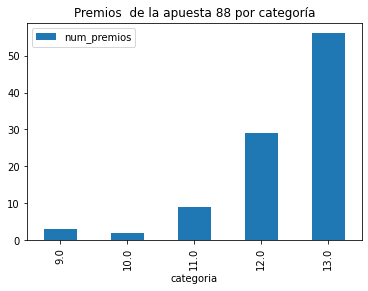

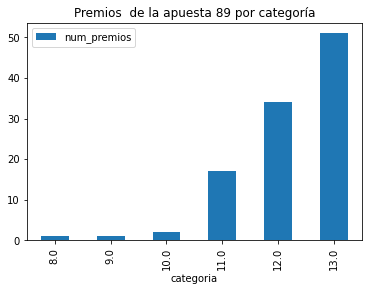

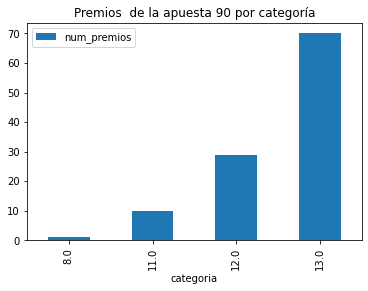

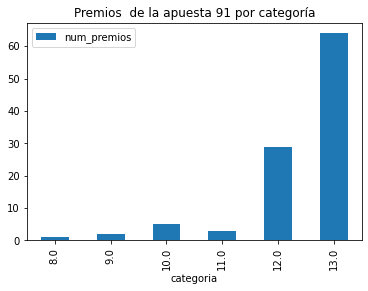

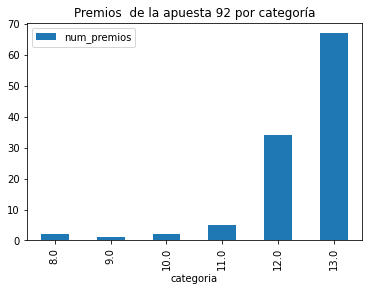

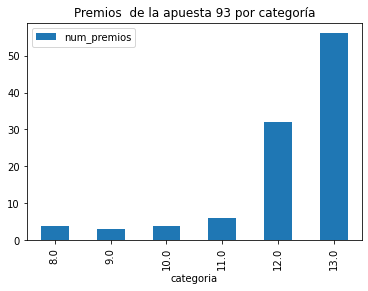

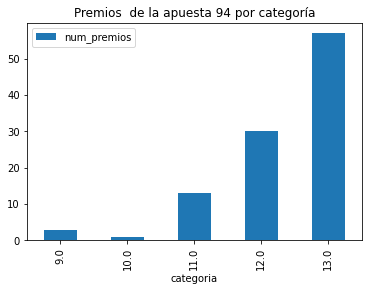

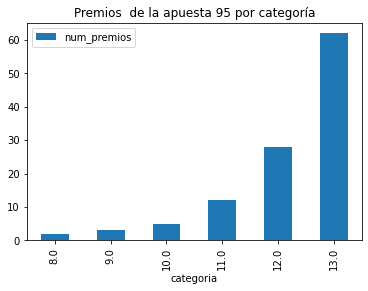

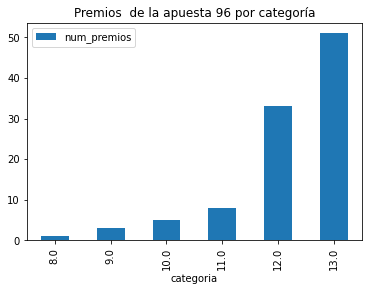

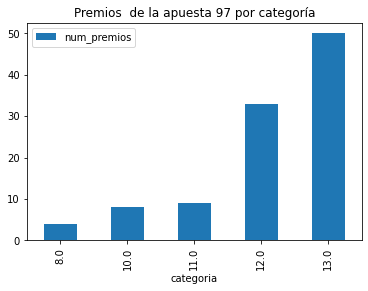

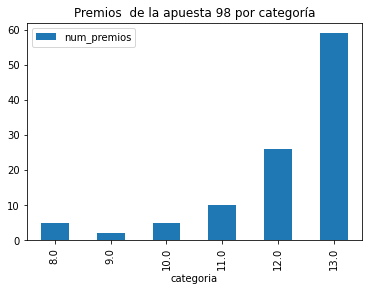

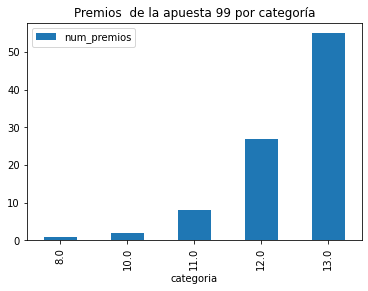

In [49]:
for apuesta_id in apuestas['id'].unique():
    numeros = set(apuestas[(apuestas['id'] == apuesta_id) & (apuestas['type'] == 'numero')]['num'].values)
    estrellas = set(apuestas[(apuestas['id'] == apuesta_id) & (apuestas['type'] == 'estrella')]['num'].values)
    
    _premios = check_for_prizes(numeros, estrellas, premios, reorg_data)
    presentar_premios_histograma(_premios, apuesta_id)

Esta segunda visualizacón es mucho mas clara y fácil de entender.